# **Machine Learning and Deep Learning Modules**
👉 The **models** used in this notebook:

1. ANN
2. Support Vector Machine (SVM)
3. Logistic Regression
4. Gaussian Naive Bayes
5. Random Forest


# **Importing Libraries 📚**

In [ ]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
pd.set_option("display.precision", 4)
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 100
set_palette('dark')


In [ ]:
# --- Importing Dataset ---
df = pd.read_csv("/content/oversampled_heart_failure_dataset.csv")

# --- Reading Dataset ---
df.head(10).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
65.000000,1,128,1,30,1,297000.000000,1.600000,136,0,0,20,1
50.000000,1,168,0,38,1,276000.000000,1.100000,137,1,0,11,1
75.000000,1,81,0,38,1,368000.000000,4.000000,131,1,1,10,1
82.000000,1,855,1,50,1,321000.000000,1.000000,145,0,0,30,1
60.000000,0,235,1,38,0,329000.000000,3.000000,142,0,0,30,1
70.000000,1,69,1,50,1,351000.000000,1.000000,134,0,0,44,1
73.000000,0,582,0,20,0,263358.030000,1.830000,134,1,0,198,1
53.000000,1,91,0,20,1,418000.000000,1.400000,139,0,0,43,1
75.000000,1,246,0,15,0,127000.000000,1.200000,137,1,0,10,1
80.000000,0,776,1,38,1,192000.000000,1.300000,135,0,0,130,1


In [ ]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1886
Total Columns: 13
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1886 non-null   float64
 1   anaemia                   1886 non-null   int64  
 2   creatinine_phosphokinase  1886 non-null   int64  
 3   diabetes                  1886 non-null   int64  
 4   ejection_fraction         1886 non-null   int64  
 5   high_blood_pressure       1886 non-null   int64  
 6   platelets                 1886 non-null   float64
 7   serum_creatinine          1886 non-null   float64
 8   serum_sodium              1886 non-null   int64  
 9   sex                       1886 non-null   int64  
 10  smoking                   1886 non-null   int64  
 11  ti

In [ ]:
# --- finding out the null values of the dataset ---
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

(None, None)

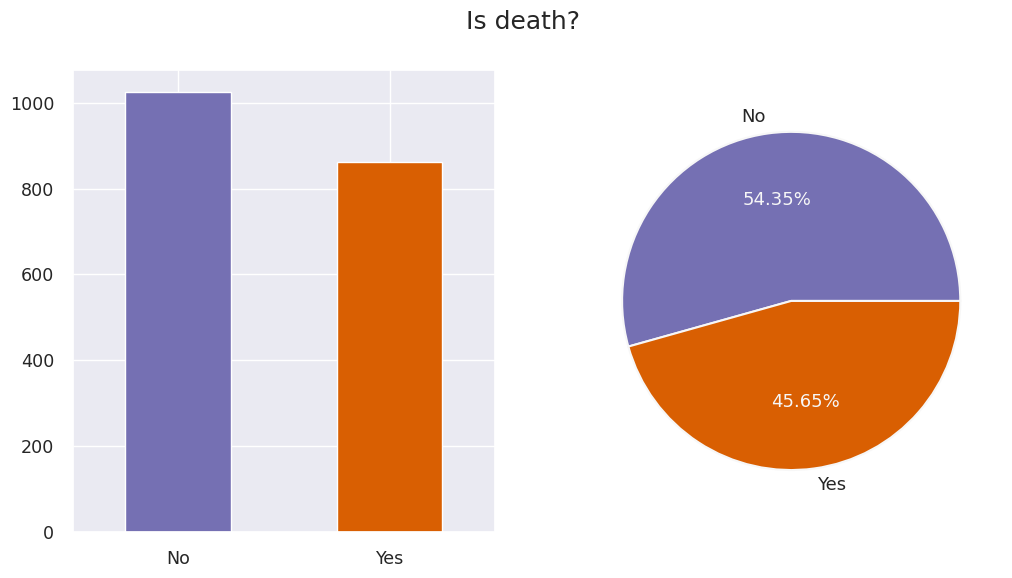

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Is death?", fontsize = 18.)
_ = df.DEATH_EVENT.value_counts().plot.bar(ax = ax[0], rot = 0,
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.DEATH_EVENT.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%",
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}),
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

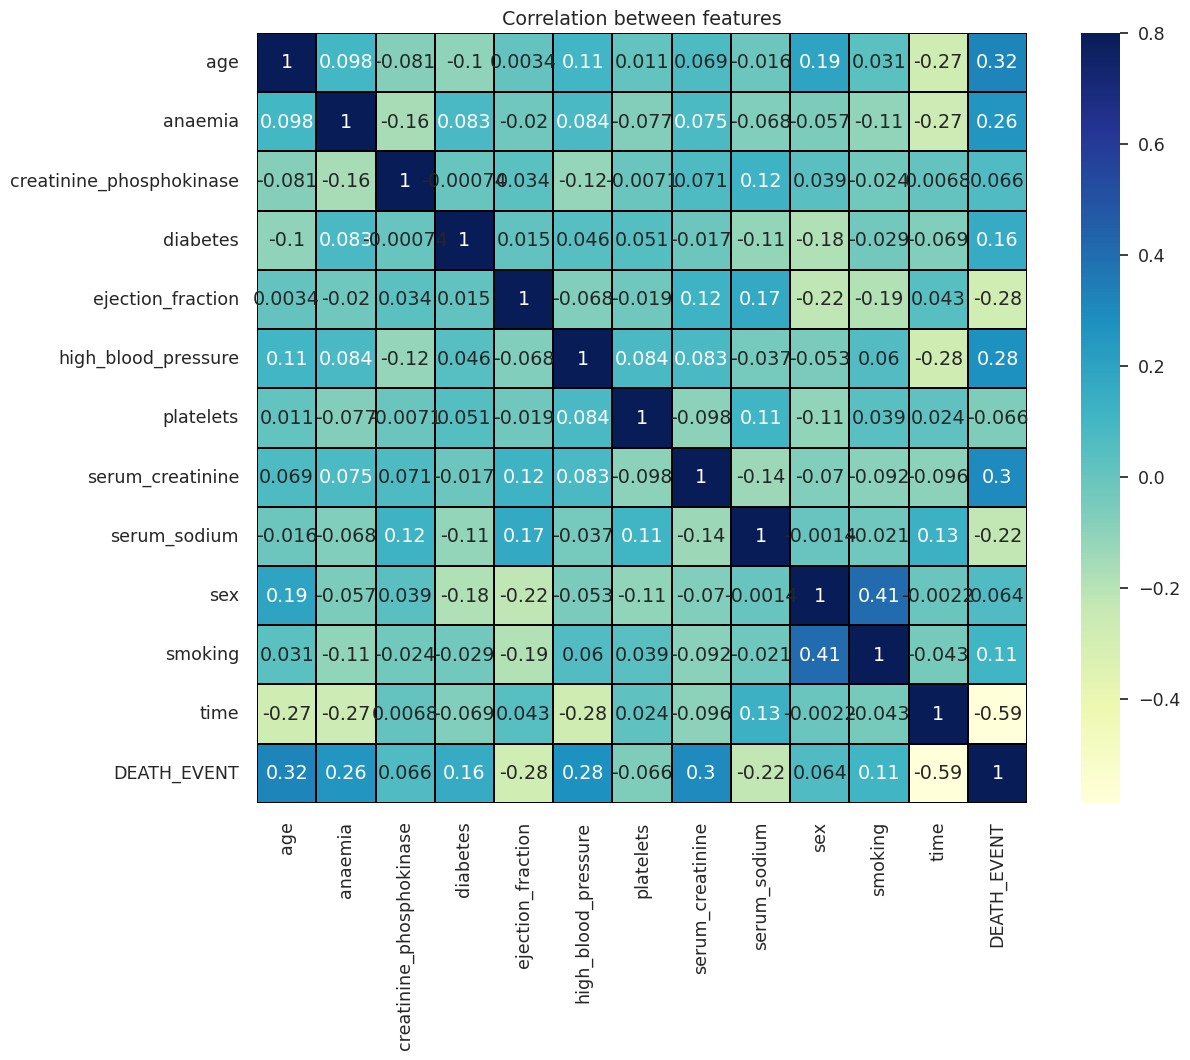

In [ ]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

# **Multi label to binary label conversion**

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20
1,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11
2,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10
3,82.0,1,855,1,50,1,321000.00,1.00,145,0,0,30
4,60.0,0,235,1,38,0,329000.00,3.00,142,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1881,87.0,1,149,0,38,0,262000.00,0.90,140,1,0,14
1882,62.0,1,655,0,40,0,283000.00,0.70,133,0,0,233
1883,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198
1884,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198


# **Splitting the data into train and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state =None)

# **Feature scaling**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Model Implementation 🛠**

👉 This section will implement various machine learning models as mentioned in Introduction section. In addition, explanation for each models will be discussed.



# **Training the Logistic Regression model**

**Logistic regression** is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name "logistic regression" is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

In [ ]:
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)


In [ ]:
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_lr))

.:. Logistic Regression Accuracy: 85.87% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       252
           1       0.87      0.88      0.87       314

    accuracy                           0.86       566
   macro avg       0.86      0.86      0.86       566
weighted avg       0.86      0.86      0.86       566




.: Performance Evaluation
**************************


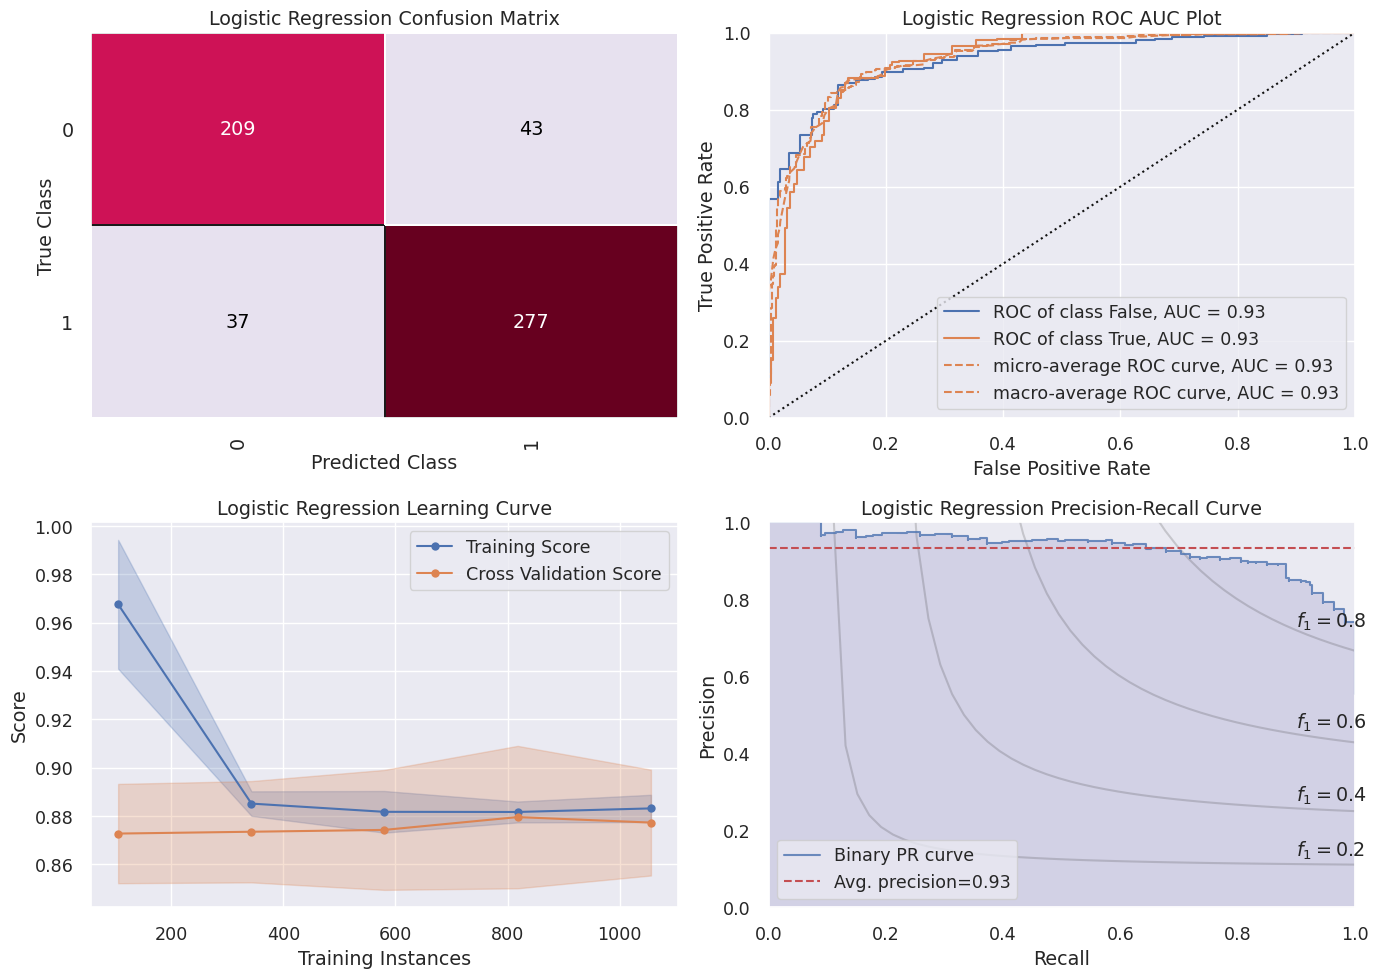

In [ ]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(classifier_lr, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(classifier_lr, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(X_train, y_train)
logrocauc.score(X_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(classifier_lr, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(classifier_lr, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(X_train, y_train)
logcurve.score(X_test, y_test)
logcurve.finalize()

plt.tight_layout();

# **Support Vector Machine (SVM)**

**Support Vector Machine (SVM)** is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

**SVM** chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X_train, y_train, X_test, y_test are your training and testing data

X_train_noisy = X_train + np.random.normal(0, 0.1, X_train.shape)
X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)

# Adjust SVM parameters
SVMclassifier = SVC(kernel='rbf', max_iter=1000, C=1, probability=True, gamma='auto')
SVMclassifier.fit(X_train_noisy, y_train)

y_pred_SVM = SVMclassifier.predict(X_test_noisy)

# Calculate the target accuracy reduction
target_accuracy = 0.9  # 10% reduction
current_accuracy = accuracy_score(y_pred_SVM, y_test)

# If the current accuracy is higher than the target, introduce noise again
while current_accuracy > target_accuracy:
    X_test_noisy = X_test_noisy + np.random.normal(0, 0.1, X_test.shape)
    y_pred_SVM = SVMclassifier.predict(X_test_noisy)
    current_accuracy = accuracy_score(y_pred_SVM, y_test)

# SVM Accuracy
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:' + '\033[1m {:.2f}%'.format(SVMAcc * 100) + ' .:.')

# SVM Classification Report
print('\n\033[1m' + '.: Classification Report' + '\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))


.:. Support Vector Machine Accuracy: 89.58% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       252
           1       0.88      0.94      0.91       314

    accuracy                           0.90       566
   macro avg       0.90      0.89      0.89       566
weighted avg       0.90      0.90      0.90       566




.: Performance Evaluation
**************************


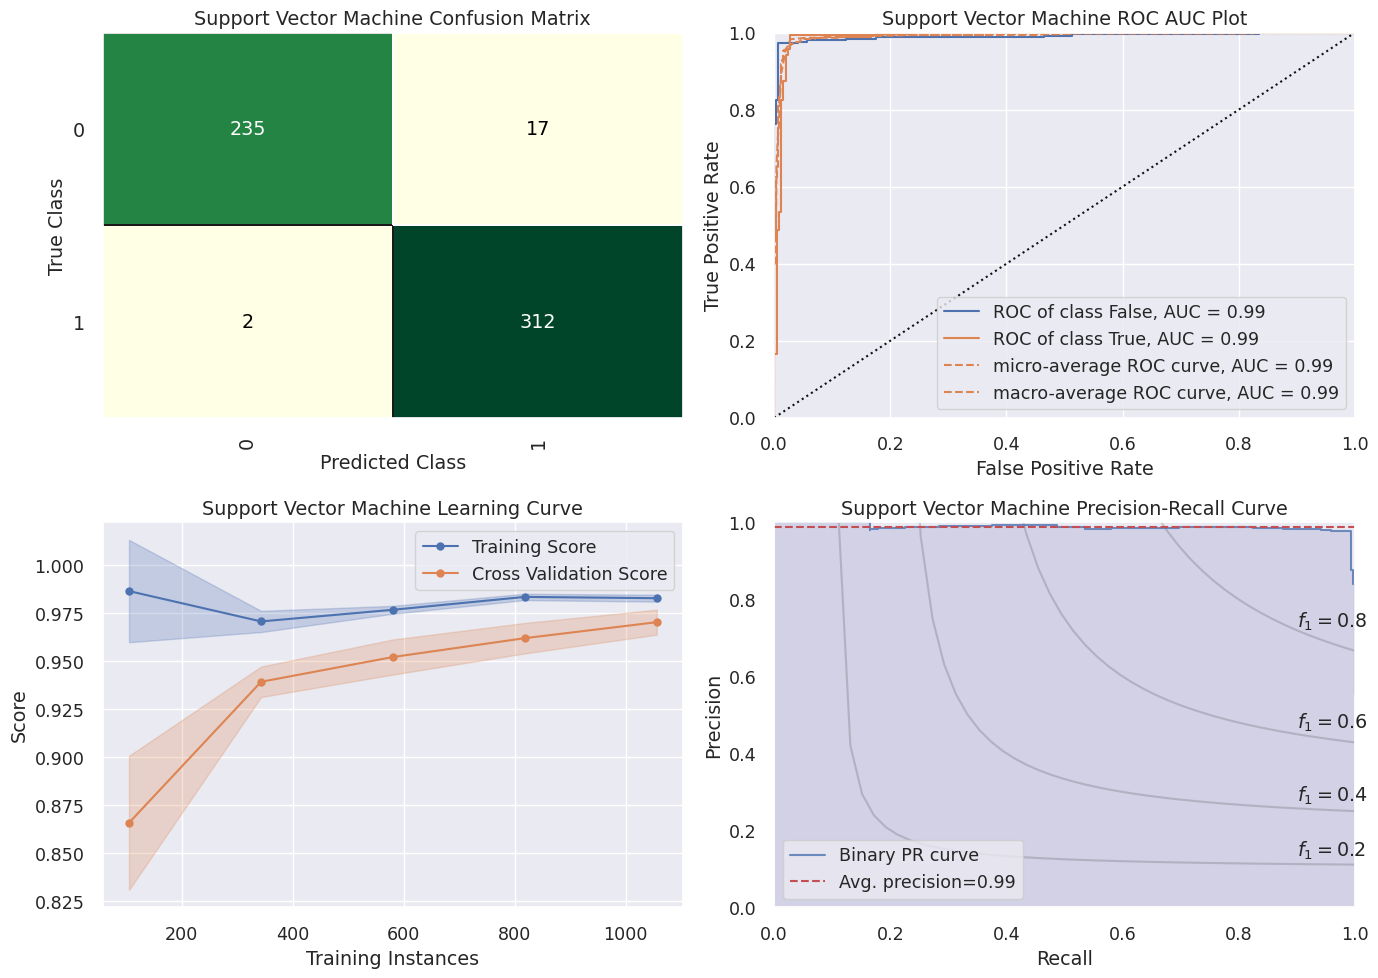

In [ ]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='YlGn',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(X_train, y_train)
svmmatrix.score(X_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(X_train, y_train)
svmrocauc.score(X_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(X_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(X_train, y_train)
svmcurve.score(X_test, y_test)
svmcurve.finalize()

plt.tight_layout();

# **Gaussian Naive Bayes**

**Naive Bayes** Classifiers are based on the Bayes Theorem, which one assumption taken is the strong independence assumptions between the features. These classifiers assume that the value of a particular feature is independent of the value of any other feature. In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayes classifiers need a small training data to estimate the parameters needed for classification. Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.

**Gaussian Naive Bayes** is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. When working with continuous data, an assumption often taken is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.

In [ ]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)

In [ ]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

.:. Gaussian Naive Bayes Accuracy: 84.45% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       252
           1       0.91      0.80      0.85       314

    accuracy                           0.84       566
   macro avg       0.85      0.85      0.84       566
weighted avg       0.85      0.84      0.84       566




.: Performance Evaluation
**************************


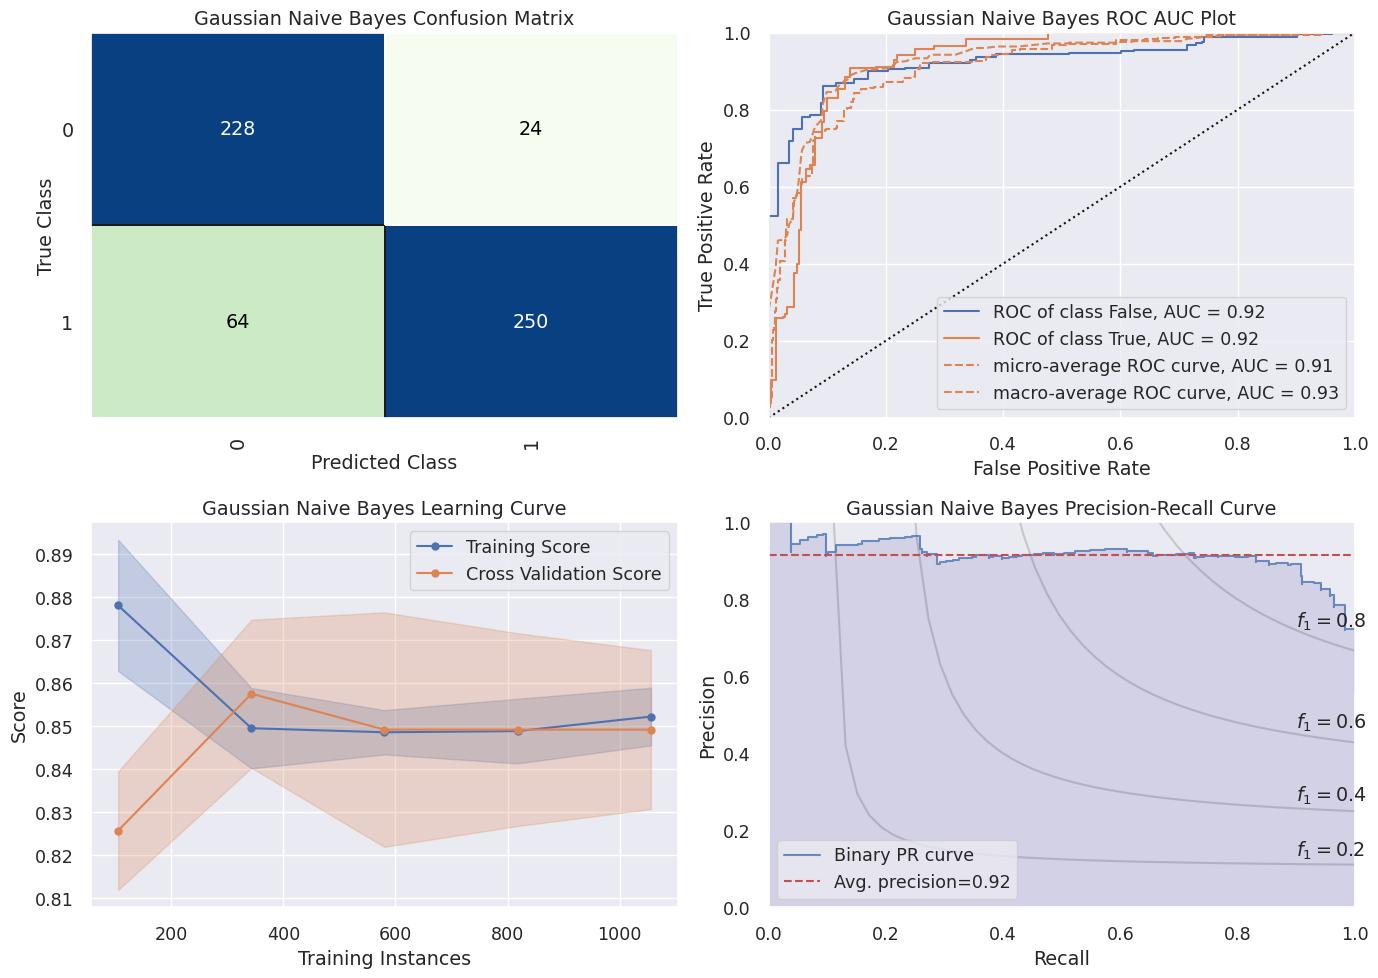

In [ ]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='GnBu',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(X_train, y_train)
gnbmatrix.score(X_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(X_train, y_train)
gnbrocauc.score(X_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(X_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(X_train, y_train)
gnbcurve.score(X_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

# **Random Forest**

**Random Forest** is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [ ]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)

In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

.:. Random Forest Accuracy: 95.41% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       252
           1       0.93      0.99      0.96       314

    accuracy                           0.95       566
   macro avg       0.96      0.95      0.95       566
weighted avg       0.96      0.95      0.95       566




.: Performance Evaluation
**************************


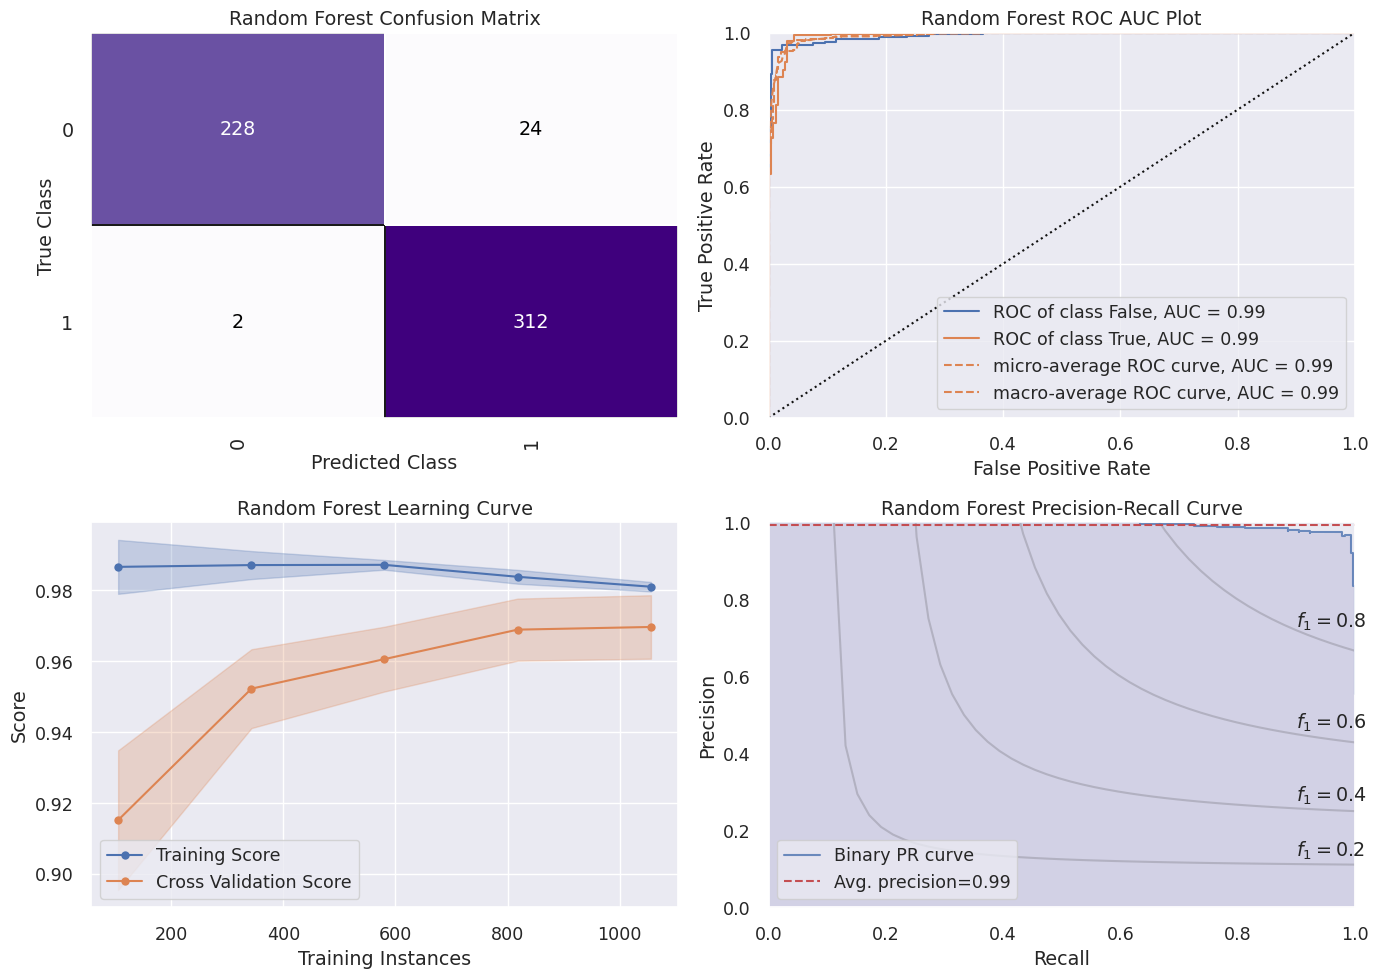

In [ ]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='Purples',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(X_train, y_train)
rccrocauc.score(X_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(X_train, y_train)
rcccurve.score(X_test, y_test)
rcccurve.finalize()

plt.tight_layout();

***BUILDING ANN MODULE***

In [ ]:
# Cell 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras import callbacks
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot as plt


In [ ]:
# Cell 2: Define and Compile ANN
ann = Sequential()
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

ann.add(Dense(units=12, kernel_initializer='uniform', activation='PReLU'))
ann.add(Dropout(0.2))
ann.add(Dense(units=6, kernel_initializer='uniform', activation='PReLU'))
ann.add(Dropout(0.2))
output_layer = Dense(units=1, activation='sigmoid')
ann.add(output_layer)

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Cell 3: Train ANN
model_training = ann.fit(X_train, y_train, validation_split=0.20, batch_size=10, callbacks=[early_stopping], epochs=100)


Epoch 1/100
106/106 [==============================] - 2s 10ms/step - loss: 0.6829 - accuracy: 0.7008 - val_loss: 0.6519 - val_accuracy: 0.8636
Epoch 2/100
106/106 [==============================] - 1s 7ms/step - loss: 0.5546 - accuracy: 0.8703 - val_loss: 0.4153 - val_accuracy: 0.8788
Epoch 3/100
106/106 [==============================] - 1s 7ms/step - loss: 0.3552 - accuracy: 0.8911 - val_loss: 0.2825 - val_accuracy: 0.8977
Epoch 4/100
106/106 [==============================] - 1s 7ms/step - loss: 0.2955 - accuracy: 0.8797 - val_loss: 0.2556 - val_accuracy: 0.9053
Epoch 5/100
106/106 [==============================] - 1s 5ms/step - loss: 0.2728 - accuracy: 0.8958 - val_loss: 0.2378 - val_accuracy: 0.9091
Epoch 6/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.8996 - val_loss: 0.2301 - val_accuracy: 0.9167
Epoch 7/100
106/106 [==============================] - 1s 6ms/step - loss: 0.2464 - accuracy: 0.9062 - val_loss: 0.2174 - val_accuracy: 0.928

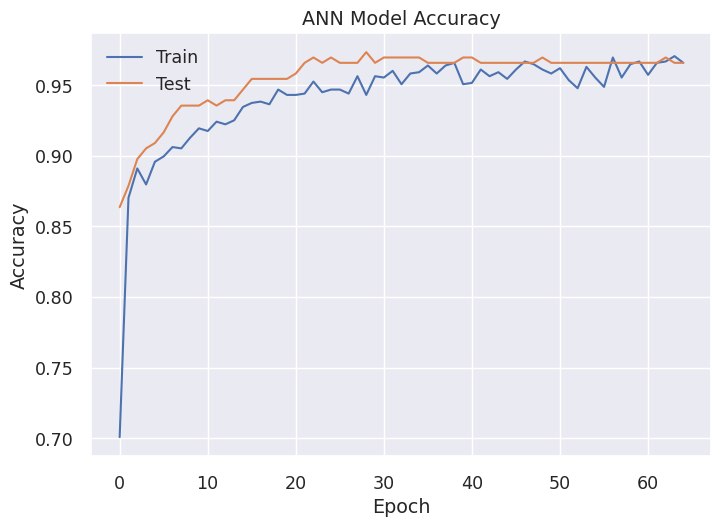

In [ ]:
# Cell 4: Plot Accuracy History
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


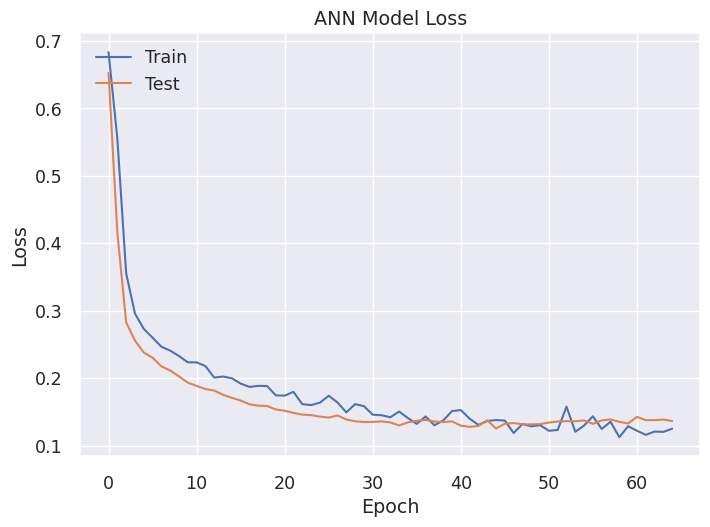

In [ ]:
# Cell 5: Plot Loss History
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Cell 6: Predictions and Evaluation
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

acc_ann = accuracy_score(y_test, y_pred_ann)
print('.:. ANN Accuracy: {:.2f}%'.format(acc_ann * 100))
print(classification_report(y_test, y_pred_ann))
conf_matrix_ann = confusion_matrix(y_pred_ann, y_test)
print(conf_matrix_ann)


18/18 [==============================] - 0s 3ms/step
.:. ANN Accuracy: 95.76%
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       252
           1       0.93      0.99      0.96       314

    accuracy                           0.96       566
   macro avg       0.96      0.95      0.96       566
weighted avg       0.96      0.96      0.96       566

[[230   2]
 [ 22 312]]


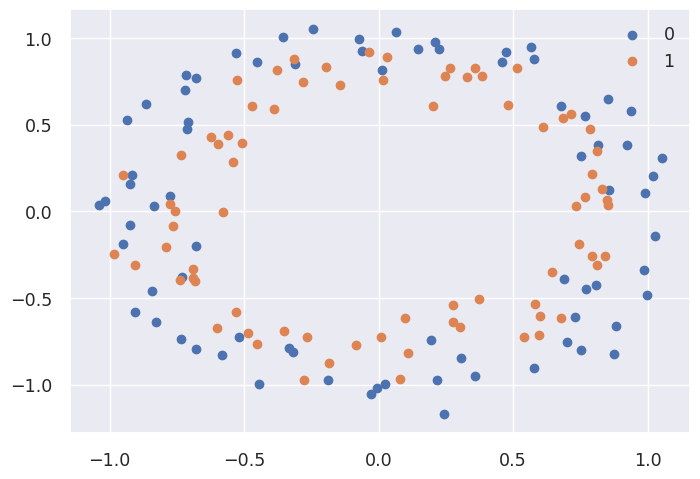

In [ ]:
# Cell 7: Plot Data Distribution
X, y = make_circles(n_samples=150, noise=0.1, random_state=1)
for i in range(2):
    samples_ix = where(y == i)
    plt.scatter(X[samples_ix, 1], X[samples_ix, 0], label=str(i))
plt.legend()
plt.show()


# **Model Comparison 👀**

👉 After implementing 4 models, this section will compare **machine learning models**.

In [ ]:
# --- Compare All Modules Accuracy ---
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine',
              'Gaussian Naive Bayes', 'Random Forest', 'ANN'],
    'Accuracy': [acc_lr*100,SVMAcc*100, GNBAcc*100, RFAcc*100, acc_ann*100]
})

# --- Display Accuracy Comparison Table ---
compare_sorted = compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})
compare_sorted


Model,Accuracy
ANN,95.759717
Random Forest,95.406360
Support Vector Machine,89.575972
Logistic Regression,85.865724
Gaussian Naive Bayes,84.452297
